In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pickle
import os, sys

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, parent_dir)
# os.chdir("..")

2.2.3
3.4.2


In [3]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time



In [4]:
ema_logging.log_to_stderr(ema_logging.INFO)
os.chdir("/Users/benschaefer/Desktop/epa141-model/final assignment")
print(os.getcwd())
# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(5)

/Users/benschaefer/Desktop/epa141-model/final assignment


In [5]:
# EXP_PATH = "./saved_runs/subspace_experiments.pkl"
# OUT_PATH = "./saved_runs/subspace_outcomes.pkl"
EXP_PATH = "./saved_runs/base_case_exp.pkl"
OUT_PATH = "./saved_runs/base_case_out.pkl"

with open(EXP_PATH, "rb") as file:
    experiments_df = pickle.load(file)
with open(OUT_PATH, "rb") as file:
    outcome_df = pickle.load(file)

In [6]:
outcome_df = pd.DataFrame({k: v.flatten() for k, v in outcome_df.items()})

<Axes: xlabel='Expected flood-related annual deaths ', ylabel='Number of Scenarios'>

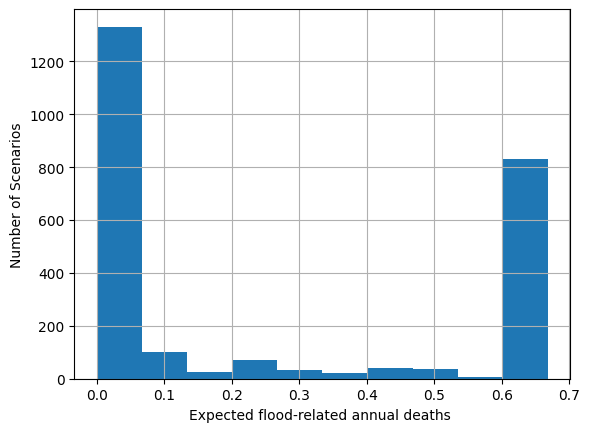

In [ ]:
# for col in outcome_df.columns:
# plt.title(f"{col}")
# outcome_df[col].hist()
# plt.show()
# plt.close()

plt.xlabel("Expected flood-related annual deaths ")
plt.ylabel("Number of Scenarios")
plt.axvline(x=0.4, color='red', linestyle='--', linewidth=2)
outcome_df["A.1_Expected Number of Deaths"].hist()
#.sort_values(ascending=False).head()
# plt.show()
# plt.close()

In [8]:
cleaned_experiments = experiments_df.drop(labels=[l.name for l in dike_model.levers], axis=1)

In [9]:
label = 'A.1_Expected Number of Deaths'
# label = "RfR Total Costs"

data = outcome_df[label]
threshold = data.quantile(0.90)
print(threshold)
y = data >= 0.4

0.6613131844528595


In [10]:
np.sum(y)

np.int64(917)

In [11]:
y = np.array(y)

In [12]:
from ema_workbench.analysis import prim
from ema_workbench.analysis import scenario_discovery_util as sdutil

prim_alg = prim.Prim(cleaned_experiments,y, threshold=0.5)
box1 = prim_alg.find_box()

[MainProcess/INFO] column policy dropped from analysis because it has only one category
[MainProcess/INFO] column model dropped from analysis because it has only one category
[MainProcess/INFO] 2500 points remaining, containing 917 cases of interest


binary


[MainProcess/INFO] mean: 1.0, mass: 0.3568, coverage: 0.9727371864776445, density: 1.0 restricted_dimensions: 1


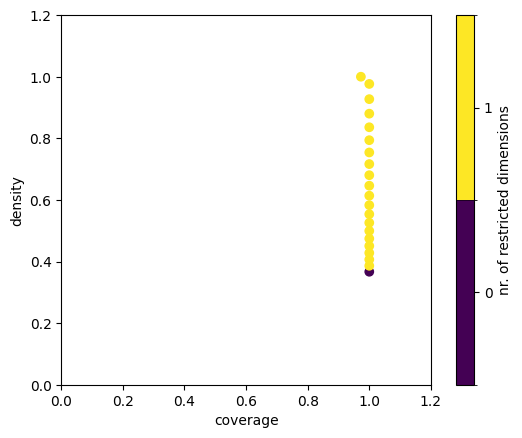

In [13]:
box1.show_tradeoff()
plt.show()

In [14]:
box1.peeling_trajectory[box1.peeling_trajectory["res_dim"] == 4]

,coverage,density,id,k,mass,mean,n,res_dim


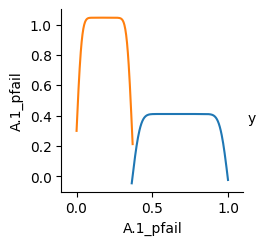

In [15]:
box1.show_pairs_scatter()

[<Figure size 640x480 with 1 Axes>]

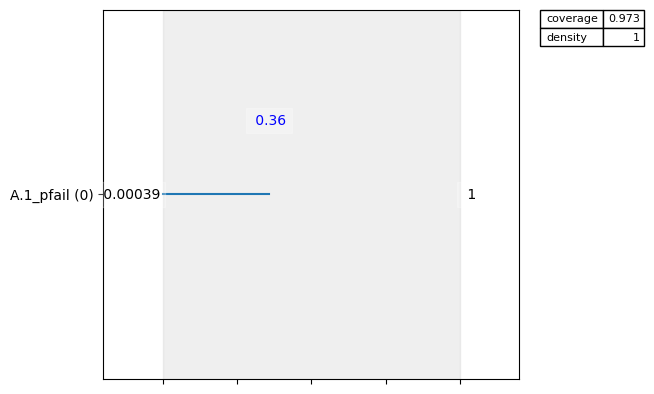

In [16]:
box1.inspect(style="graph")

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


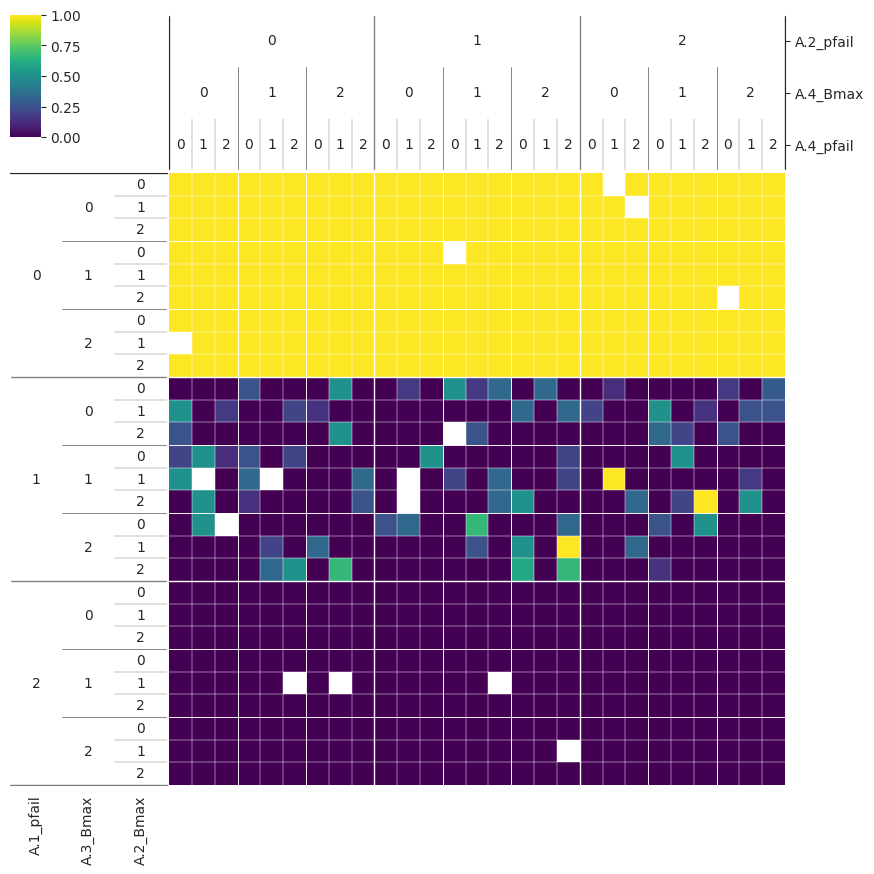

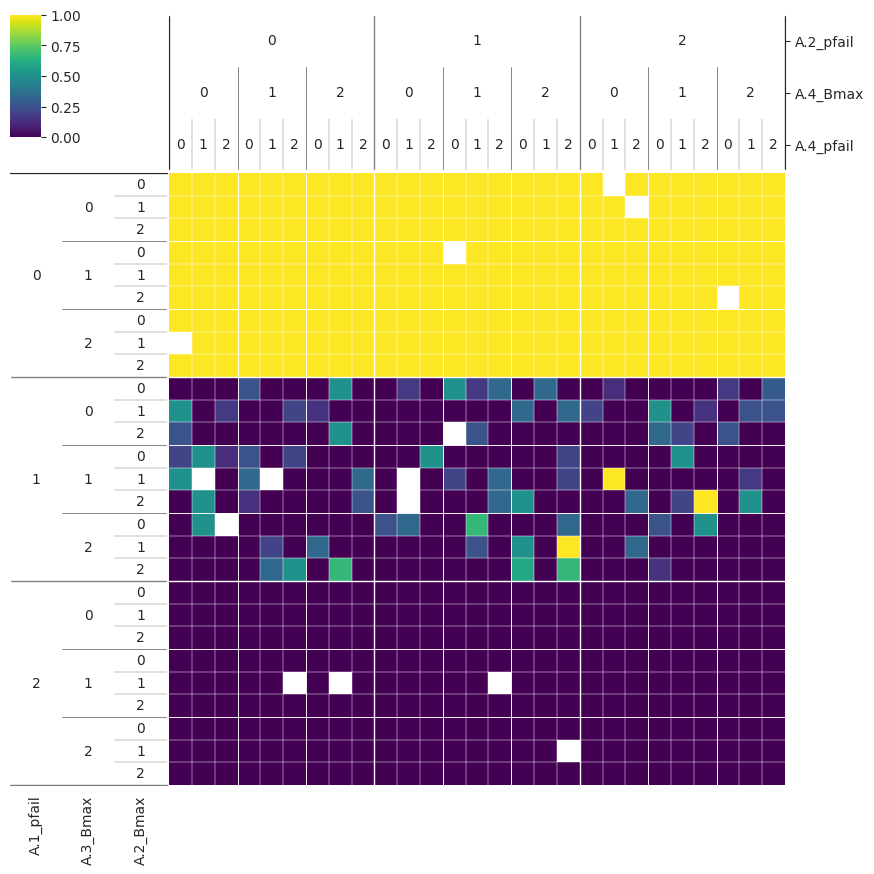

In [17]:
from ema_workbench.analysis import dimensional_stacking
dimensional_stacking.create_pivot_plot(cleaned_experiments, y)

## Sobol